# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,481,104,54,91,209,67,11,218,31,24,170,223,697,196,74,4,21,187,196
1,180,102,54,106,221,68,11,207,32,24,164,228,638,238,71,0,26,189,200
2,125,90,46,80,143,62,11,159,43,20,156,169,366,186,74,17,7,185,193
3,461,106,52,107,211,62,8,200,33,23,161,218,602,200,67,9,17,194,201
4,539,109,55,96,191,57,6,241,28,26,170,267,857,242,85,8,9,184,184
5,439,98,47,109,202,59,11,199,34,23,154,207,586,165,61,1,33,194,208
6,444,102,53,101,238,72,4,238,28,26,163,267,844,242,85,7,22,184,184
7,281,82,43,73,154,65,7,151,44,19,143,178,341,160,76,5,11,185,189
8,734,88,40,55,114,53,7,132,53,18,139,142,249,158,87,0,7,176,183
9,181,78,36,60,116,56,6,123,55,17,124,141,221,121,78,3,16,178,185


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,410.151184,93.788707,44.950820,82.273224,168.927140,61.693989,8.442623,168.905282,40.974499,20.590164,148.202186,188.236794,441.120219,174.845173,72.158470,6.475410,12.550091,189.087432,195.876138
std,241.499416,8.258980,6.312956,15.918647,32.939257,7.294958,3.753209,34.095322,7.965899,2.644643,14.878373,32.186138,181.396902,32.902306,7.128284,4.916255,8.761423,6.081533,7.259222
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,203.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,166.000000,317.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,406.000000,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.000000,362.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,615.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,601.000000,198.000000,75.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,49.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,38.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Best hyperparameters:  {'tol': 0.001, 'solver': 'saga', 'multi_class': 'multinomial', 'max_iter': 500, 'C': 464.1588833612782}


C:\Users\motyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


F1 score:  0.7377049180327869
Accuracy score:  0.7377049180327869


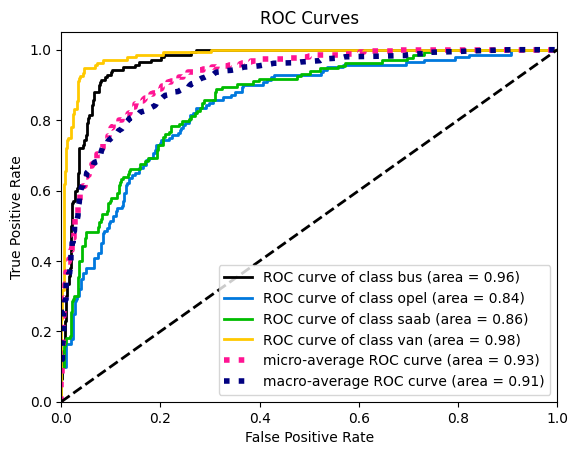

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt

# Set the hyperparameters for logistic regression
param_distributions = {
    'C': np.logspace(1, 6, 10),
    'multi_class': ['multinomial'],
    'solver': ['saga'],
    'tol': [1e-3],
    'max_iter': [500]
}

# Create a logistic regression model
model = LogisticRegression()

# Perform random search cross-validation to find the optimal hyperparameters
random_search = RandomizedSearchCV(model, param_distributions, cv=5)
random_search.fit(X_train_pd, y_train)

# Get the best hyperparameters found by random search
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters: ", best_params)

# Fit the logistic regression model with the best hyperparameters on the entire training data
clf = LogisticRegression(**best_params)
clf.fit(X_train_pd, y_train)

# Make predictions on the training data
y_train_pred = clf.predict(X_train_pd)

# Calculate and print the f1 score and accuracy score
f1 = f1_score(y_train, y_train_pred, average='micro')
accuracy = accuracy_score(y_train, y_train_pred)
print("F1 score: ", f1)
print("Accuracy score: ", accuracy)

# Plot the ROC curve
predicted_proba = clf.predict_proba(X_train_pd)
skplt.metrics.plot_roc(y_train, predicted_proba)
plt.show()


In [8]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

#! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

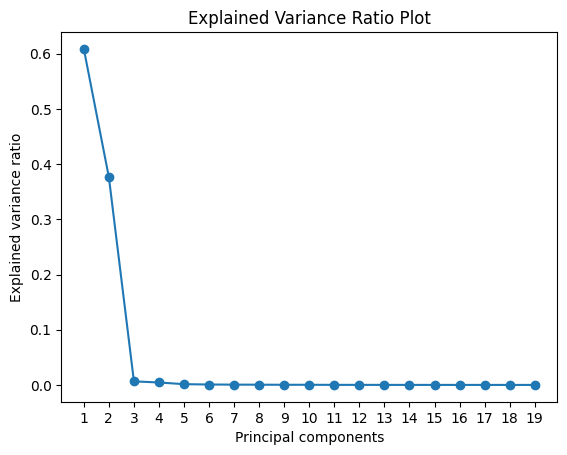

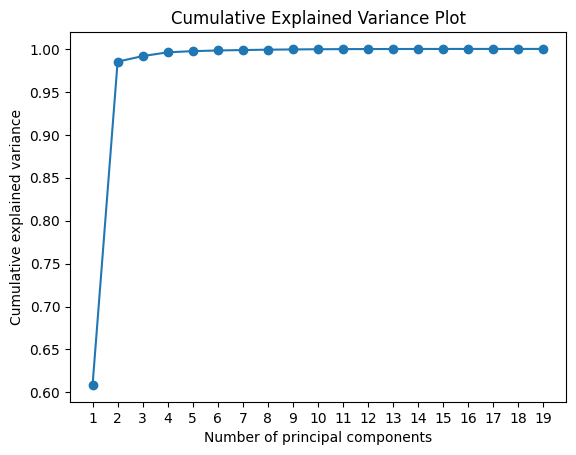

In [9]:
from sklearn.decomposition import PCA

# Apply PCA to the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_pd)

# Calculate the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Plot the explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance Ratio Plot')
plt.xticks(range(1, len(explained_var_ratio) + 1))
plt.show()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance Plot')
plt.xticks(range(1, len(cumulative_var_ratio) + 1))
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [10]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_pd)
X_test_normalized = scaler.transform(X_test)

# Apply PCA to the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_normalized)
explained_var_ratio = pca.explained_variance_ratio_

# Select the appropriate number of components
cumulative_var_ratio = np.cumsum(explained_var_ratio)
num_components = np.argmax(cumulative_var_ratio >= 0.95) + 1
print("Number of components:", num_components)

# Apply PCA transformation with the selected number of components
pca_final = PCA(n_components=num_components)
X_train_final = pca_final.fit_transform(X_train_normalized)
X_test_final = pca_final.transform(X_test_normalized)


Number of components: 8


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

F1 score:  0.6848816029143898
Accuracy score:  0.6848816029143898


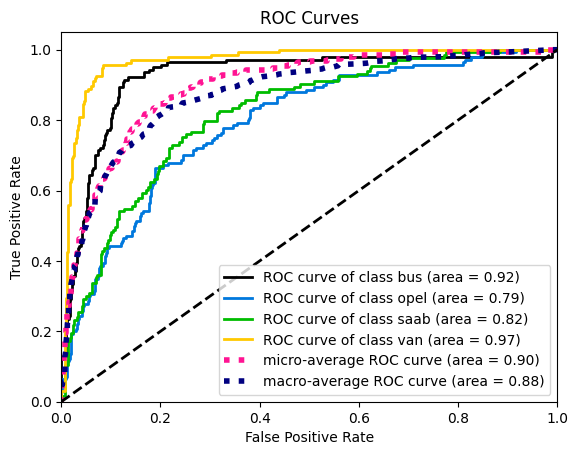

In [19]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt

# Create a logistic regression model with cross-validation
model = LogisticRegressionCV(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    cv=5
)

# Fit the logistic regression model on the PCA-transformed training data
model.fit(X_train_final, y_train)

# Make predictions on the PCA-transformed training data
y_train_pred = model.predict(X_train_final)

# Calculate and print the f1 score and accuracy score
f1 = f1_score(y_train, y_train_pred, average='micro')
accuracy = accuracy_score(y_train, y_train_pred)
print("F1 score: ", f1)
print("Accuracy score: ", accuracy)

# Plot the ROC curve
predicted_proba = model.predict_proba(X_train_final)
skplt.metrics.plot_roc(y_train, predicted_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score

# Initialize a list to store the mean f1 scores and accuracy scores for different max_depth values
mean_f1_scores = []
mean_accuracy_scores = []

# Try different values of max_depth and perform cross-validation
max_depth_values = range(1, 21)  # Adjust the range as needed

for max_depth in max_depth_values:
    # Create a decision tree classifier with the current max_depth
    model = DecisionTreeClassifier(max_depth=max_depth)

    # Perform cross-validation and calculate the mean f1 score and accuracy score
    f1_scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring='f1_micro')
    accuracy_scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring='accuracy')

    mean_f1 = f1_scores.mean()
    mean_accuracy = accuracy_scores.mean()

    # Append the mean scores to the lists
    mean_f1_scores.append(mean_f1)
    mean_accuracy_scores.append(mean_accuracy)

# Find the optimal max_depth with the highest mean f1 score
optimal_max_depth_f1 = max_depth_values[np.argmax(mean_f1_scores)]

# Find the optimal max_depth with the highest mean accuracy score
optimal_max_depth_accuracy = max_depth_values[np.argmax(mean_accuracy_scores)]

print("Optimal max_depth (f1 score):", optimal_max_depth_f1)
print("Optimal max_depth (accuracy score):", optimal_max_depth_accuracy)

# Train a decision tree with the optimal max_depth on the entire training data
decision_tree_f1 = DecisionTreeClassifier(max_depth=optimal_max_depth_f1)
decision_tree_accuracy = DecisionTreeClassifier(max_depth=optimal_max_depth_accuracy)

decision_tree_f1.fit(X_train_final, y_train)
decision_tree_accuracy.fit(X_train_final, y_train)

# Make predictions on the training data using the decision tree with optimal max_depth
y_train_pred_f1 = decision_tree_f1.predict(X_train_final)
y_train_pred_accuracy = decision_tree_accuracy.predict(X_train_final)

# Calculate and print the f1 score and accuracy score for the decision tree
f1_f1 = f1_score(y_train, y_train_pred_f1, average='micro')
accuracy_f1 = accuracy_score(y_train, y_train_pred_f1)

f1_accuracy = f1_score(y_train, y_train_pred_accuracy, average='micro')
accuracy_accuracy = accuracy_score(y_train, y_train_pred_accuracy)

print("Decision Tree with optimal max_depth (f1 score):")
print("F1 score:", f1_f1)
print("Accuracy score:", accuracy_f1)

print("Decision Tree with optimal max_depth (accuracy score):")
print("F1 score:", f1_accuracy)
print("Accuracy score:", accuracy_accuracy)


Optimal max_depth (f1 score): 7
Optimal max_depth (accuracy score): 8
Decision Tree with optimal max_depth (f1 score):
F1 score: 0.8597449908925319
Accuracy score: 0.8597449908925319
Decision Tree with optimal max_depth (accuracy score):
F1 score: 0.9107468123861567
Accuracy score: 0.9107468123861566


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

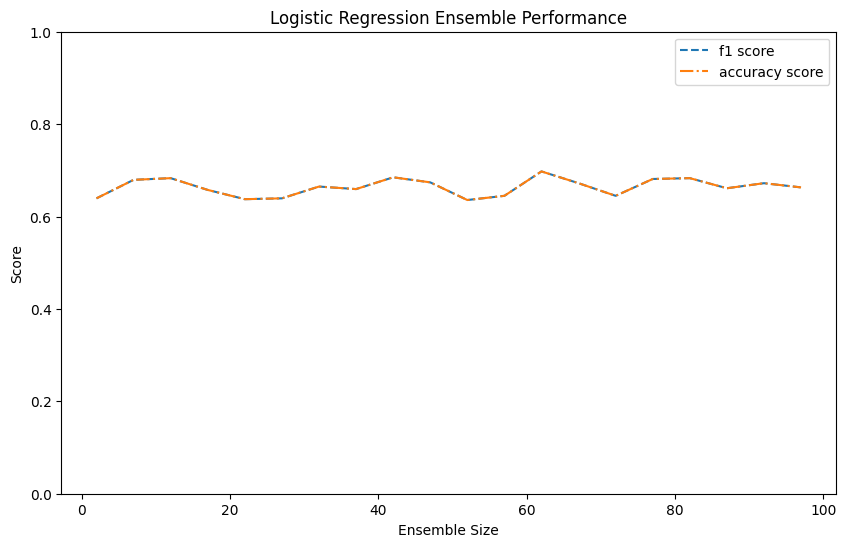

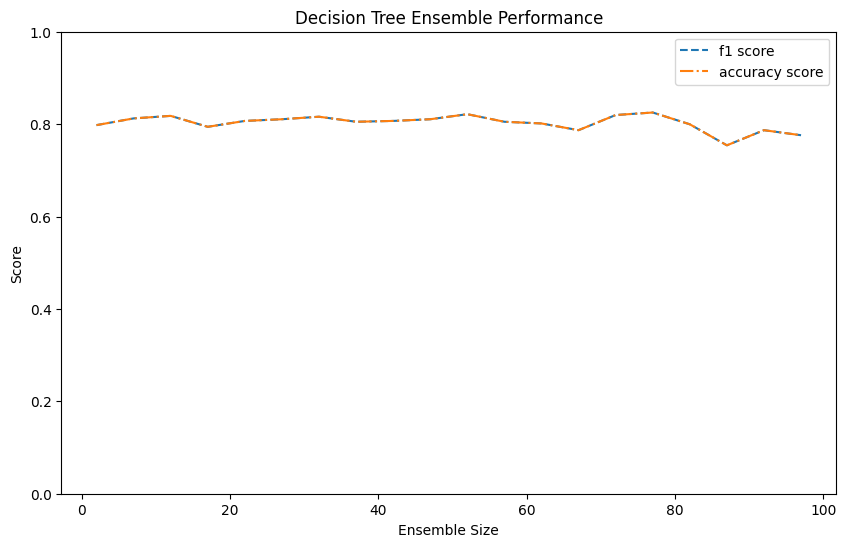

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert target variable to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize lists to store f1 and accuracy scores
f1_scores_lr = []
accuracy_scores_lr = []
f1_scores_dt = []
accuracy_scores_dt = []

# Define the range of ensemble sizes
ensemble_sizes = range(2, 101, 5)

# Create bootstrap samples from the training data
np.random.seed(42)  # For reproducibility
bootstrap_samples = [
    np.random.choice(X_train_final.shape[0], size=X_train_final.shape[0], replace=True)
    for _ in ensemble_sizes
]

# Bagging ensembles of logistic regressions
for i, ensemble_size in enumerate(ensemble_sizes):
    models_lr = [
        LogisticRegression(**best_params)
        for _ in range(ensemble_size)
    ]
    predictions_lr = np.zeros_like(y_train_encoded)

    for j, model_lr in enumerate(models_lr):
        # Retrieve the bootstrap sample for the current model
        bootstrap_sample = bootstrap_samples[i]

        # Train the model on the bootstrap sample
        model_lr.fit(X_train_final[bootstrap_sample], y_train_encoded[bootstrap_sample])

        # Make predictions on the training data
        y_train_pred_lr = model_lr.predict(X_train_final)
        predictions_lr += y_train_pred_lr

    # Average the predictions from the ensemble
    y_train_ensemble_lr = np.round(predictions_lr / ensemble_size).astype(int)

    # Calculate and store the f1 and accuracy scores
    f1_lr = f1_score(y_train_encoded, y_train_ensemble_lr, average='micro')
    accuracy_lr = accuracy_score(y_train_encoded, y_train_ensemble_lr)
    f1_scores_lr.append(f1_lr)
    accuracy_scores_lr.append(accuracy_lr)

# Bagging ensembles of decision trees
for i, ensemble_size in enumerate(ensemble_sizes):
    models_dt = [
        DecisionTreeClassifier(max_depth=optimal_max_depth_accuracy)
        for _ in range(ensemble_size)
    ]
    predictions_dt = np.zeros_like(y_train_encoded)

    for j, model_dt in enumerate(models_dt):
        # Retrieve the bootstrap sample for the current model
        bootstrap_sample = bootstrap_samples[i]

        # Train the model on the bootstrap sample
        model_dt.fit(X_train_final[bootstrap_sample], y_train_encoded[bootstrap_sample])

        # Make predictions on the training data
        y_train_pred_dt = model_dt.predict(X_train_final)
        predictions_dt += y_train_pred_dt

    # Average the predictions from the ensemble
    y_train_ensemble_dt = np.round(predictions_dt / ensemble_size).astype(int)

    # Calculate and store the f1 and accuracy scores
    f1_dt = f1_score(y_train_encoded, y_train_ensemble_dt, average='micro')
    accuracy_dt = accuracy_score(y_train_encoded, y_train_ensemble_dt)
    f1_scores_dt.append(f1_dt)
    accuracy_scores_dt.append(accuracy_dt)

# Plot f1 and accuracy scores versus ensemble size for logistic regression ensemble
plt.figure(figsize=(10, 6))
plt.plot(ensemble_sizes, f1_scores_lr, linestyle='--', label='f1 score')
plt.plot(ensemble_sizes, accuracy_scores_lr, linestyle='-.', label='accuracy score')
plt.ylim(0, 1)
plt.xlabel('Ensemble Size')
plt.ylabel('Score')
plt.title('Logistic Regression Ensemble Performance')
plt.legend()
plt.show()

# Plot f1 and accuracy scores versus ensemble size for decision tree ensemble
plt.figure(figsize=(10, 6))
plt.plot(ensemble_sizes, f1_scores_dt, linestyle='--', label='f1 score')
plt.plot(ensemble_sizes, accuracy_scores_dt, linestyle='-.', label='accuracy score')
plt.ylim(0, 1)
plt.xlabel('Ensemble Size')
plt.ylabel('Score')
plt.title('Decision Tree Ensemble Performance')
plt.legend()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

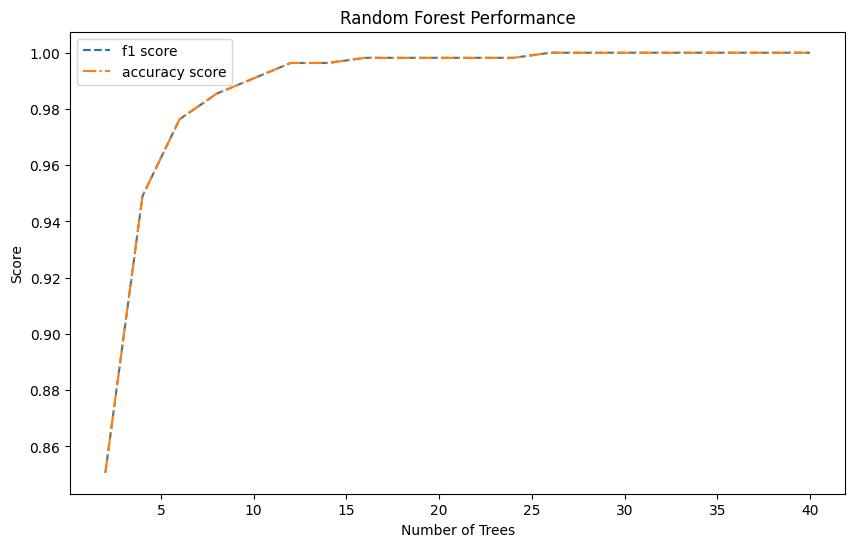

Optimal number of trees(f1 > 0.99): 8


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Initialize lists to store f1 and accuracy scores
f1_scores_rf = []
accuracy_scores_rf = []

# Define the range of tree numbers
tree_numbers = range(2, 42, 2)

# Random Forest with different tree numbers
optimal_num_trees_rf = 0
for tree_number in tree_numbers:
    model_rf = RandomForestClassifier(n_estimators=tree_number, random_state=42)
    model_rf.fit(X_train_final, y_train)

    y_train_pred_rf = model_rf.predict(X_train_final)

    f1_rf = f1_score(y_train, y_train_pred_rf, average='micro')
    accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
    f1_scores_rf.append(f1_rf)
    if f1_rf <= 0.99:
        optimal_num_trees_rf = tree_number
    accuracy_scores_rf.append(accuracy_rf)


# Plot f1 and accuracy scores versus number of trees
plt.figure(figsize=(10, 6))
plt.plot(tree_numbers, f1_scores_rf, linestyle='--', label='f1 score')
plt.plot(tree_numbers, accuracy_scores_rf, linestyle='-.', label='accuracy score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Random Forest Performance')
plt.legend()
plt.show()

print(f'Optimal number of trees(f1 > 0.99): {optimal_num_trees_rf}')

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

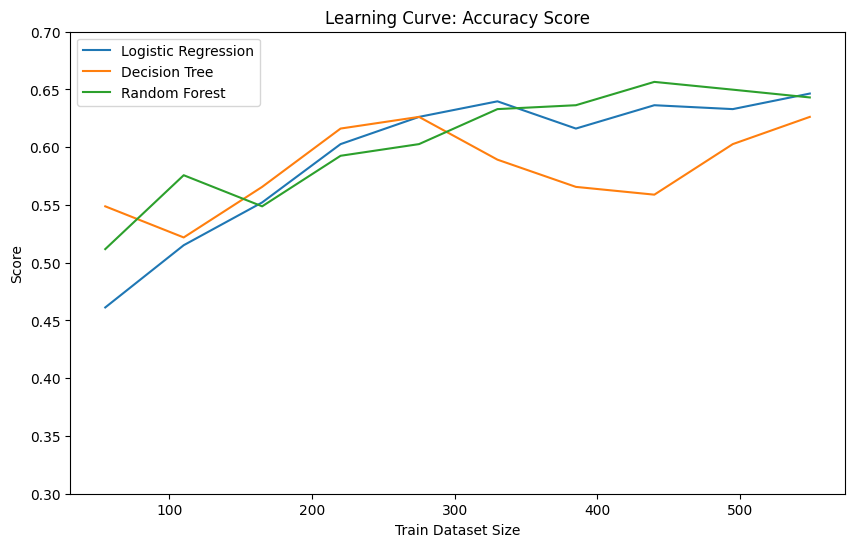

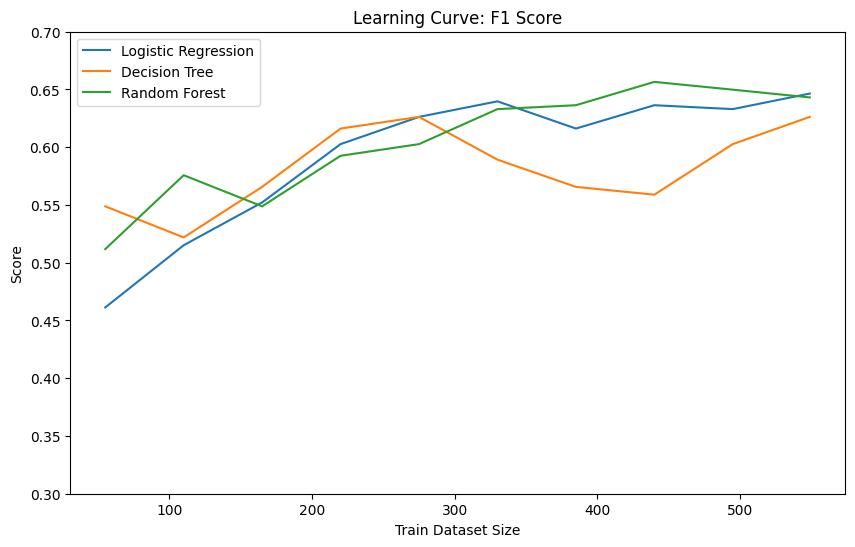

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Split the training data into parts
num_parts = 10
X_train_parts = np.array_split(X_train_final, num_parts)
y_train_parts = np.array_split(y_train, num_parts)

# Initialize lists to store accuracy and f1 scores
accuracy_scores_lr = []
f1_scores_lr = []
accuracy_scores_dt = []
f1_scores_dt = []
accuracy_scores_rf = []
f1_scores_rf = []

# Train models on increasing training dataset size
train_sizes = []
for i in range(num_parts):
    X = np.concatenate(X_train_parts[:i+1])
    y = np.concatenate(y_train_parts[:i+1])

    # Training logistic regression
    model_lr = LogisticRegression(**best_params)
    model_lr.fit(X, y)
    y_pred_lr = model_lr.predict(X_test_final)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    f1_lr = f1_score(y_test, y_pred_lr, average='micro')
    accuracy_scores_lr.append(accuracy_lr)
    f1_scores_lr.append(f1_lr)

    # Training decision tree
    model_dt = DecisionTreeClassifier(max_depth=optimal_max_depth_accuracy)
    model_dt.fit(X, y)
    y_pred_dt = model_dt.predict(X_test_final)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    f1_dt = f1_score(y_test, y_pred_dt, average='micro')
    accuracy_scores_dt.append(accuracy_dt)
    f1_scores_dt.append(f1_dt)

    # Training random forest
    model_rf = RandomForestClassifier(n_estimators=optimal_num_trees_rf)
    model_rf.fit(X, y)
    y_pred_rf = model_rf.predict(X_test_final)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf, average='micro')
    accuracy_scores_rf.append(accuracy_rf)
    f1_scores_rf.append(f1_rf)

    # Update the train dataset sizes
    train_size = X.shape[0]
    train_sizes.append(train_size)

# Plot accuracy and f1 scores versus dataset size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracy_scores_lr, label='Logistic Regression')
plt.plot(train_sizes, accuracy_scores_dt, label='Decision Tree')
plt.plot(train_sizes, accuracy_scores_rf, label='Random Forest')
plt.ylim(.3, .7)
plt.xlabel('Train Dataset Size')
plt.ylabel('Score')
plt.title('Learning Curve: Accuracy Score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, f1_scores_lr, label='Logistic Regression')
plt.plot(train_sizes, f1_scores_dt, label='Decision Tree')
plt.plot(train_sizes, f1_scores_rf, label='Random Forest')
plt.ylim(.3, 0.7)
plt.xlabel('Train Dataset Size')
plt.ylabel('Score')
plt.title('Learning Curve: F1 Score')
plt.legend()
plt.show()


#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [16]:
#! pip install xgboost

In [17]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the categorical labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


# Split the training data into training and validation sets
X_train_boost, X_valid_boost, y_train_boost, y_valid_boost = train_test_split(X_train_pd, y_train_encoded, test_size=0.2, random_state=42)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_boost, label=y_train_boost)
dvalid = xgb.DMatrix(X_valid_boost, label=y_valid_boost)

# Define the initial hyperparameters
num_classes = len(np.unique(y_train))
params = {
    'objective': 'multi:softmax',
    'num_class': num_classes,
    'eval_metric': 'mlogloss',
    'eta': 0.1,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the model and monitor performance on the validation set
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dvalid, 'valid')],
    early_stopping_rounds=10
)

# Get the optimal number of decision trees
optimal_num_trees = model.best_iteration

# Train a final model with the optimal number of decision trees
final_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=optimal_num_trees
)

# Make predictions on test data using the final model
dtest = xgb.DMatrix(X_test_pd)
y_pred = final_model.predict(dtest)

# Calculate the f1 score on the test data
f1 = f1_score(y_test_encoded, y_pred, average='micro')

# Print the optimal number of decision trees and f1 score
print("Optimal number of decision trees:", optimal_num_trees)
print("F1 score: ", f1)


[0]	valid-mlogloss:1.30876
[1]	valid-mlogloss:1.23668
[2]	valid-mlogloss:1.18372
[3]	valid-mlogloss:1.12924
[4]	valid-mlogloss:1.08161
[5]	valid-mlogloss:1.04473
[6]	valid-mlogloss:1.01180
[7]	valid-mlogloss:0.97844
[8]	valid-mlogloss:0.94502
[9]	valid-mlogloss:0.92127
[10]	valid-mlogloss:0.89505
[11]	valid-mlogloss:0.87804
[12]	valid-mlogloss:0.85968
[13]	valid-mlogloss:0.84596
[14]	valid-mlogloss:0.83460
[15]	valid-mlogloss:0.82243
[16]	valid-mlogloss:0.81129
[17]	valid-mlogloss:0.80347
[18]	valid-mlogloss:0.79269
[19]	valid-mlogloss:0.78531
[20]	valid-mlogloss:0.77757
[21]	valid-mlogloss:0.77199
[22]	valid-mlogloss:0.76699
[23]	valid-mlogloss:0.75852
[24]	valid-mlogloss:0.75330
[25]	valid-mlogloss:0.74616
[26]	valid-mlogloss:0.73999
[27]	valid-mlogloss:0.74096
[28]	valid-mlogloss:0.73551
[29]	valid-mlogloss:0.73346
[30]	valid-mlogloss:0.73331
[31]	valid-mlogloss:0.72996
[32]	valid-mlogloss:0.72661
[33]	valid-mlogloss:0.72381
[34]	valid-mlogloss:0.72104
[35]	valid-mlogloss:0.72118
[3